In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

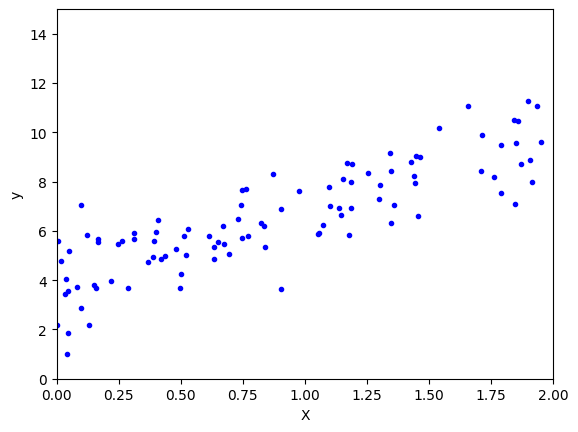

In [2]:
# Gradient Descent
# np.random.rand 包含 [0, 1) 区间内的随机数。
X = 2*np.random.rand(100,1)
# np.random.randn 其元素取自标准正态分布（均值为 0，标准差为 1）的随机数。
y = 4 + 3*X  + np.random.randn(100,1)
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show()


In [3]:
# 左边连接一列1，当作b
X_b = np.c_[np.ones((100,1)),X]

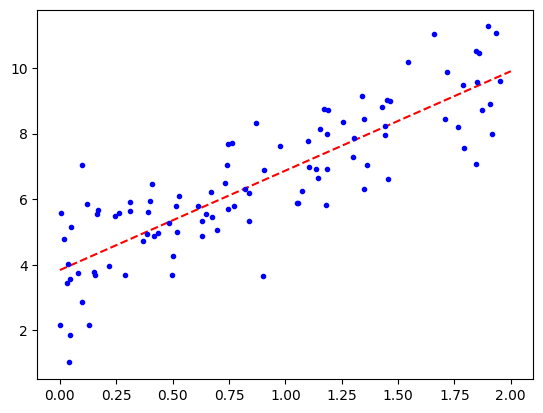

In [4]:
# 最小二乘法  公式法
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# 新建两个样本点 0 ，2 然后使用红色虚线连接
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
# - 实线 -- 虚线
plt.plot(X_new,y_predict,'r--')
plt.plot(X,y,'b.')
plt.show()

In [5]:
# 梯度下降法
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print('梯度下降法')
# b偏置参数
print(lin_reg.intercept_)
# w权重参数
print(lin_reg.coef_)

梯度下降法
[3.83948461]
[[3.03030163]]


In [6]:
# 数据预处理 
# 标准化 ~ N(0,1)：收敛速度快 数据的取值范围上相同
# 批量梯度下降
# 定义学习率  迭代次数  样本个数  随机theta值
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
print('批量梯度下降')
print(theta) # theta [[b] , [w1]]

批量梯度下降
[[3.83948461]
 [3.03030163]]


In [7]:
# 记录theta变化过程
theta_path_bgd = []
def plot_gradient_descent(theta,eta,theta_path = None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new,y_predict,'r-')
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
    if theta_path is not None:
        theta_path.append(theta)
    plt.axis([0,2,0,15])
    plt.title = ('eta = {}'.format(eta))

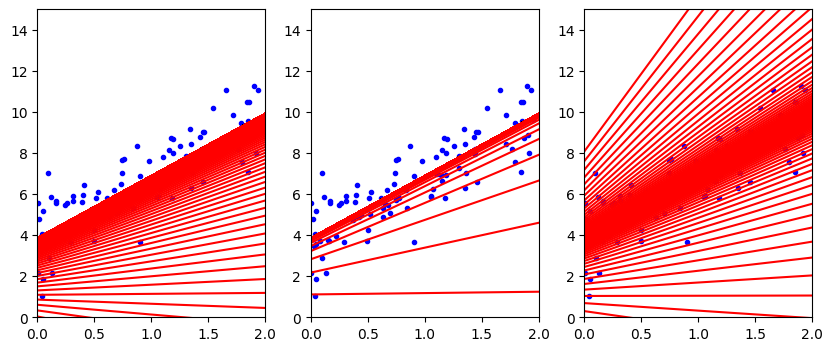

In [8]:
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta , eta = 0.02)
plt.subplot(132)
plot_gradient_descent(theta , eta = 0.1 ,theta_path = theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta , eta = 0.5)
plt.show()

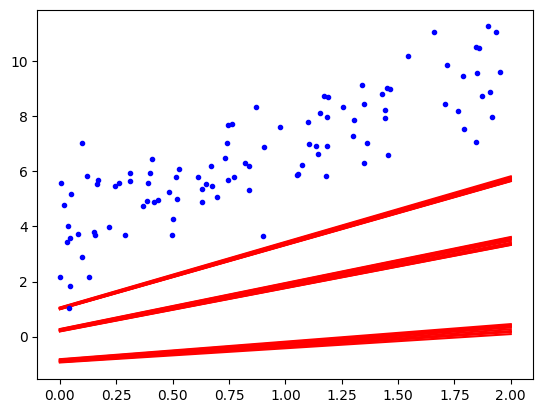

In [9]:
# 随机梯度下降  随机选择样本
theta_path_sgd = []
m = len(X_b)
n_epochs = 50
t0 = 5
t1 = 50

# 衰减
def learning_schedule(t):
    return t0/(t1+t)

theta = np.random.randn(2,1)

# 遍历所有样本 完成一次epoch
for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 3 and  i<10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')
        random_index  = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(n_epochs*m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)
plt.plot(X,y,'b.')
plt.show()

In [10]:
# mini-batch梯度下降
theta_path_mgd = []
minibatch = 16
n_epochs = 50
t = 0
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    # 洗牌
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch):
        t += 1
        xi = X_b_shuffled[i: i+minibatch]
        yi = y_shuffled[i: i+minibatch]
        gradients = 2/minibatch*xi.T.dot(xi.dot(theta)-yi)
        # t 梯度下降次数
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mgd.append(theta)

[[[3.83948461]
  [3.03030163]]]


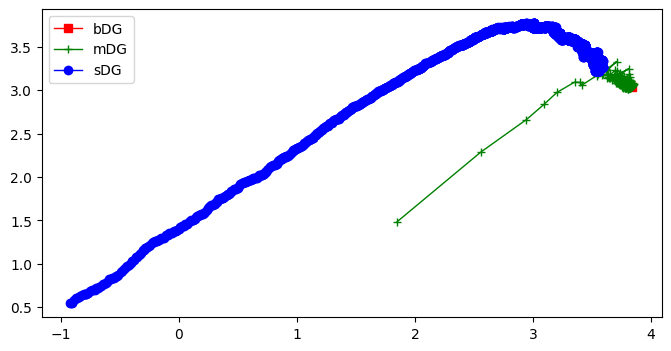

In [11]:
# 对比
theta_path_bgd = np.array(theta_path_bgd)
print(theta_path_bgd)
theta_path_mgd = np.array(theta_path_mgd)
theta_path_sgd = np.array(theta_path_sgd)
plt.figure(figsize=(8,4))
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'r-s', linewidth = 1 ,label = 'bDG')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+', linewidth = 1 ,label = 'mDG')
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'b-o', linewidth = 1 ,label = 'sDG')
plt.legend(loc = 'upper left')

plt.show()